<a href="https://colab.research.google.com/github/icarocarmona/pos-tech-dtat/blob/main/f2_ml_and_time_series/ml_with_python/Aula_5_Limita%C3%A7%C3%B5es_e_os_Modelos_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo atrasos de voos

Prever se um determinado voo sofrerá atrasos, a partir da informação da partida programada

- Flight: Número do voo.
- Time: Horario de partida. do VimeoVideo
- Lenght: Duração do voo
- Airline: nome do avião
- AirportFrom: Partida
- AirportTo: Destino
- DayOfWeek: Dia da semana
- Class: Classe de atraso

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://github.com/FIAP/Pos_Tech_DTAT/raw/61a634996879d5c1384af6f567e29659ad68b727/Aula%2006/Base%20de%20Dados/airlines.csv", sep=',')

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [ ]:
df.shape

(539382, 8)

In [ ]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [ ]:
duplicated_cols = []
for col in df.columns:
  if df[col].duplicated().any():
    duplicated_cols.append(col)
print(duplicated_cols)

['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


In [ ]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


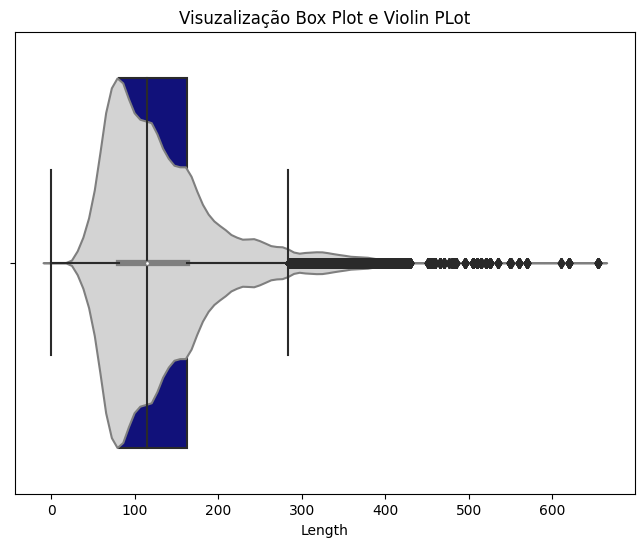

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))

sns.violinplot(x='Length', data=df, ax=ax, color='lightgray')

sns.boxplot(x='Length', data=df, ax=ax, whis=1.5, color='darkblue')

ax.set_title("Visuzalização Box Plot e Violin PLot")

plt.show()

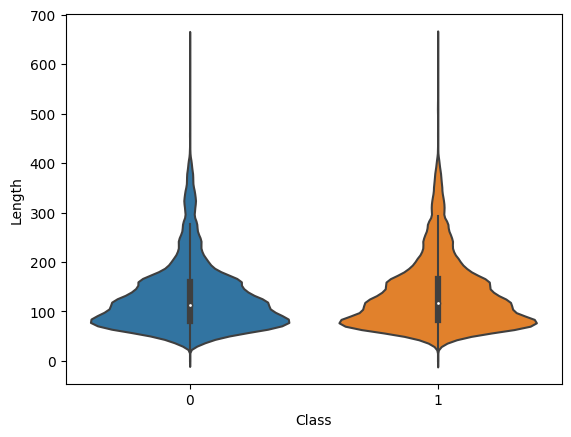

In [ ]:
sns.violinplot(x='Class', y='Length',data=df)
plt.show()

In [ ]:
atraso_voo = df.groupby('Class')
atraso_voo.describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

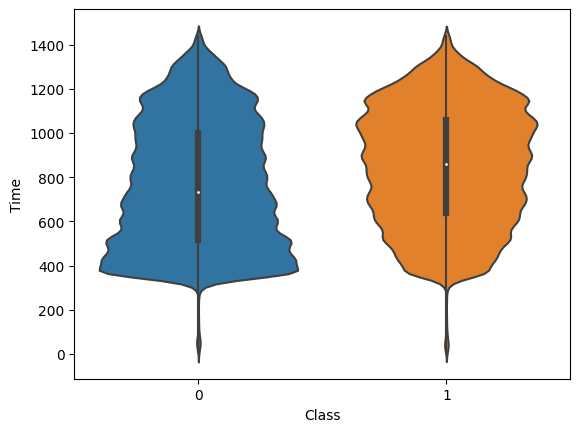

In [ ]:
sns.violinplot(x='Class', y='Time',data=df)
plt.show()

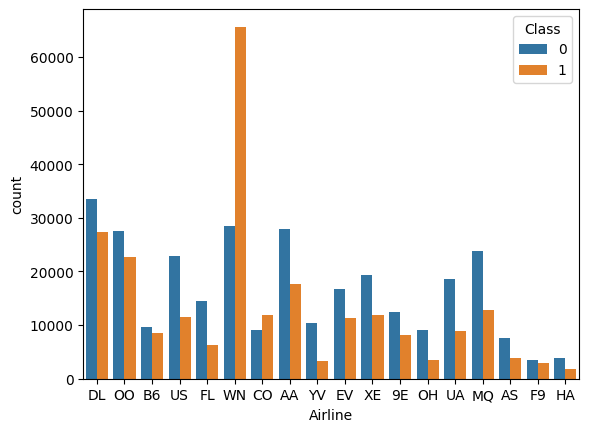

In [ ]:
sns.countplot(x='Airline', hue='Class',data=df)
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='count'>

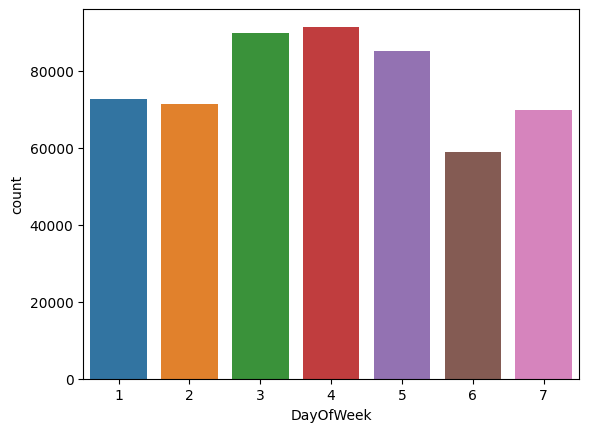

In [ ]:
diaSemana = list(range(1,8))
sns.countplot(x='DayOfWeek', data=df, order=diaSemana)

<Axes: xlabel='Class', ylabel='count'>

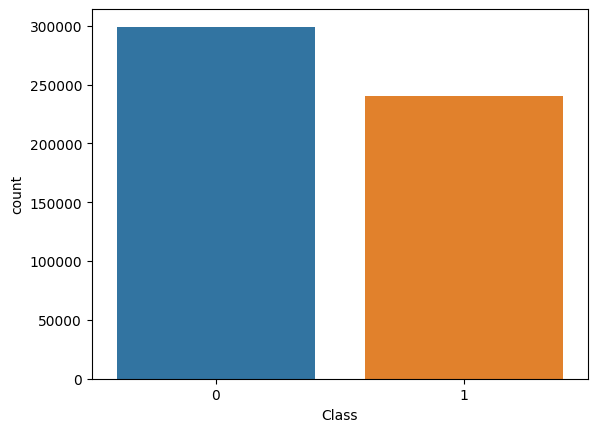

In [ ]:
sns.countplot(x='Class', data=df)

Observe que aqui podemos ter um problema ao constuiir um modelo de classificação. A base de dados não está equilibrada e a falta de equilibrio na base de dados pode deixar o algoritmo enviesado.

Esse tipo de problema é chamado de **desbalanceamento de classes**.

Quando uma classe é muito mais frequente que as outras no conjunto de dados, o modelo tende a dar mais importancia a essa classe, o que pode levar a uma classificação incorreta das classes minoritárias

## Pré-processamento da base

Transforma as variáveis em numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
df['AirportFrom'] = LabelEncoder().fit_transform(df['AirportFrom'])
df['AirportTo'] = LabelEncoder().fit_transform(df['AirportTo'])

In [ ]:
df['Airline'] = LabelEncoder().fit_transform(df['Airline'])

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0
3,31.0,1410.0,344.0,14,203,217,6,0
4,563.0,692.0,98.0,8,32,16,4,0


## Separando a base de dados

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
y = df[['Class']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=7)

## Criando o modelo de naive bayes

Naive bayes é um algoritimo baseado no teorema de Bayes e na suposição de independencia condicional entre atributos.

O modelo calcula a probalidade condicional de uma determinada classe, dada uma entrada de dados ou conjunto de atributos, utilizando a regras de Bayes.

Ele assume que os atributos de entrada são independentes entre si, ou seja, a presença ou ausencia de um atributo não é agetada pela presença ou ausencia de outro atributo.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

## Validando modelo

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.59


De modo geral, o modelo não obteve um poder preditivo grande...

Nessa caso, podemos encontrar alguns desafios (limtações) sobre os modelos classficadores.

Podemos ter alguns impedimentos que podem ocasionar resultados ruins em nossos algoritmos, sendo eles: Algoritmos ruins ou dados ruins.

 Vamos conversar um pouquinho sobre esses desafios! Se tratando de dados ruins, podemos ter alguns fatores:

**Quantidade insuficiente de dados:** Com uma amostra de dados muito pequena, existirá um "ruído de amostragem" e se houver uma amostra muito grande com dados não representativos, o método de amostragem também pode ser falho (Viés de amostragem).

**Dados de treinamento não representativos:** O objetivo de um bom modelo de aprendizado de máquina é generalizar bem a partir dos dados de treinamento, sendo assim, é importante buscar uma base de dados representativa. Será que a sua base de dados consegue generalizar?

**Dados de baixa qualidade:** Aqui é preciso se dedicar a limpeza dos dados, uma base não consistente pode impactar na detecção de padrões.

**Características irrelevantes:** Entra lixo, sai lixo. Atenção aos dados que entram no seu modelo! A dica aqui é a dedicação na etapa de feature engineering ou técnicas de redução de dimensionalidade.









## Equilibrando a base de dados

Para equilibrar a base de dados, podemos utilizar algumas técnicas como por exemplo a biblioteca resample do sklearn.utils, utilizando o oversampling.

O oversampling é o processo de duplicar ou criar novas amostras da classe minoritária, enquanto o undersampling é o processo de remover algumas amostras da classe majoritária.

Vamos analisar como nosso resultado pode ter um uprade com oversampling?

In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

In [ ]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=7)

In [ ]:
df_equilibrado = pd.concat([df_majority,df_minority_upsampled])

<Axes: xlabel='Class', ylabel='count'>

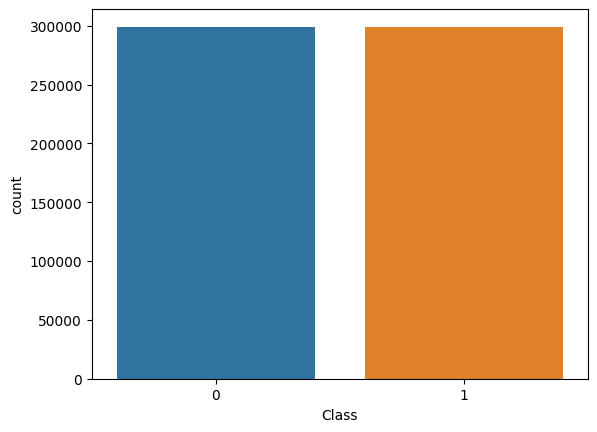

In [ ]:
sns.countplot(x='Class', data=df_equilibrado)

## Testando o algoritmo coma base equilibrada

In [ ]:
x_equilibrado = df_equilibrado[['Flight', 'Time', 'Length', 'DayOfWeek']]
y_equilibrado = df_equilibrado[['Class']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado,y_equilibrado,test_size=0.3,stratify=y_equilibrado, random_state=7)

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.57


Também não tivemos muito avanço. Nessa caso, quando todas as alternativas não dão certo, o que podemos fazer?

Podemos tentar buscar novas alternativas utilizando outros algoritmos de machine learning.


Agora, vamos falar um pouquinho sobre algoritmos ruins:



- Sobreajuste nos dados (overfiting): Quando o seu modelo funciona muito bem com os dados de treinamento mas não generaliza bem novos dados de entrada. Isso pode acontecer quando o modelo é muito complexo em relação ao ruído e quantidade.
Como solução podemos pensar aqui em:
    - Simplificar o modelo.
    - Coletar mais dados.
    - Reduzir o ruído (exemplo, remover outliers).
    - Regularização: Chamamos de regularização quando restringimos um modelo para simplificar e reduzir o risco de reajuste dos dados. A regularização pode ajudar a generalizar melhor o modelo em novos exemplos de dados.



- Subajuste dos dados (underfiting): Nesse caso seu modelo ficou muito simples ao ponto de não aprender corretamente os dados.
Algumas soluções:
    - Selecionar um modelo mais poderoso.
    - Feature engineering.
    - Reduzir as regularizações.

# Testando com Random Forest

O modelo de Random Forest cria de forma aleatória várias Árvores de Decisão (Decision Trees) e combina o resultado de todas elas para chegar no resultado final.

Vamos analisar se combinar uma base de dados equilibrada com um algoritmo diferente e poderoso de classificação pode melhorar nossos resultados.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado,y_equilibrado,test_size=0.3, random_state=7)

In [ ]:
rf = RandomForestClassifier(random_state=7)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", round(accuracy_rf, 2))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Defina os modelos que você deseja testar
models = [
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

# Loop através dos modelos e avalie o desempenho
for name, model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5)  # Substitua X e y pelos seus dados
    print(f'Modelo: {name}')
    print(f'Acurácia média: {scores.mean()}')
    print(f'Desvio padrão da acurácia: {scores.std()}')
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Modelo: Naive Bayes
Acurácia média: 0.5739639177104104
Desvio padrão da acurácia: 0.0006646723504728655

Modelo: Decision Tree
Acurácia média: 0.6603488830250857
Desvio padrão da acurácia: 0.0009349582147323688



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Modelo: Random Forest
Acurácia média: 0.6801380249065705
Desvio padrão da acurácia: 0.001602730981021734



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
